In [124]:
import pandas as pd
import os
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
import matplotlib as mpl

import seaborn as sns

import numpy as np

import yfinance as yf

In [125]:
start_date       = '2021-12-23'
month_begin_date = '2022-04-01'
end_date         = '2022-04-30'

## Some Functions For Easy of Use

In [ ]:
def get_stock_data(symbol=['VTI'], start_date=start_date, end_date=end_date):
    """returns df of VTI data to compare with crypto data"""
    data_df = yf.download(symbol, start=start_date, end=end_date)
    
    return data_df['Close']

## Setup Global Plotting Parameters

In [147]:
plt.figure()
plt.rcParams.update({'font.size': 16}) # must set at the top. It controls text size in charts and plots

plt.rcParams["figure.dpi"] = 70

<Figure size 720x480 with 0 Axes>

##  Find File Containing Initial Purchase and Allocations

In [4]:
# Get the data for the portfolio
_initial_purchase_file = "2022 Weighted Crypto Portfolio.csv"
_data_folder           = "./data/"

init_portfolio_path = os.path.join(_data_folder, _initial_purchase_file)
init_portfolio_path

'./data/2022 Weighted Crypto Portfolio.csv'

In [5]:
init_portfolio = pd.read_csv(init_portfolio_path).set_index('Coin', drop=True)
init_portfolio

,Amount,Net Cost,Fees,Investment,Cost Basis
Coin,,,,,
BTC,0.000307,15.00,0.07,14.93,48623.690000
ETH,0.003787,15.00,0.07,14.93,3941.660000
BNB,0.023982,12.70,0.01,12.69,529.003900
SOL,0.058000,10.50,0.05,10.45,179.330000
ADA,7.120000,9.75,0.05,9.70,1.361600
WLUNA,0.104000,9.80,0.05,9.75,93.220000
AVAX,0.080000,9.79,0.05,9.74,121.330000
DOT,0.352000,9.80,0.05,9.75,27.680000
DOGE,42.300000,7.60,0.04,7.56,0.177400


### Initial Allocation Percentages

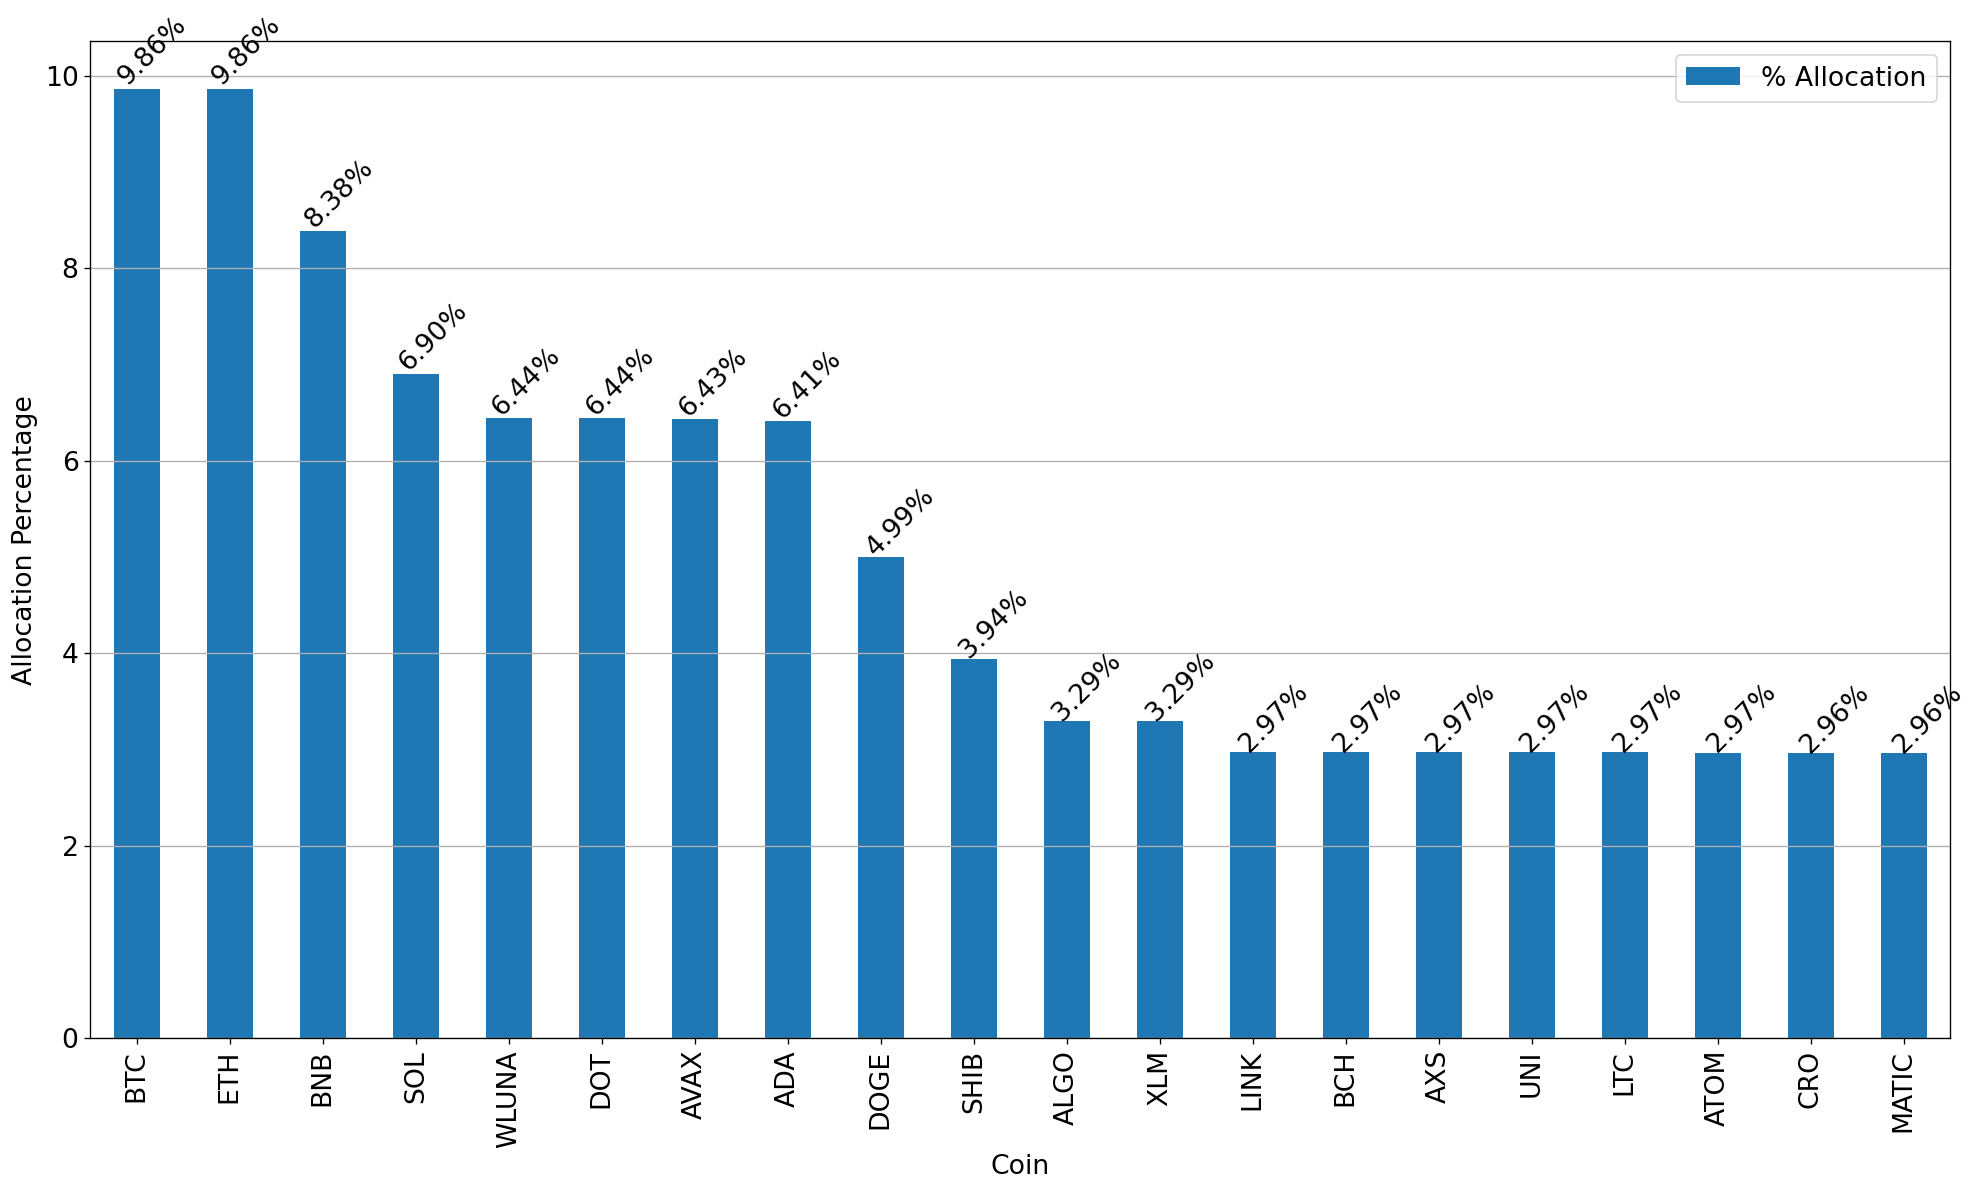

In [98]:
total = init_portfolio['Investment'].sum()

init_portfolio['% Allocation'] = (init_portfolio['Investment'] / total) * 100

#-- sort df by allocation size
init_portfolio = init_portfolio.sort_values(by='% Allocation', ascending=False)

ax = init_portfolio['% Allocation'].plot(kind='bar',
                                         grid=False,
                                         ylabel="Allocation Percentage",
                                         figsize=(20,11))

ax.grid(axis='y')
ax.legend()

#-- Annotate each bar in the chart
for p in ax.patches:
    _value:str = f"{p.get_height():.2f}%"
    ax.annotate(_value, (p.get_x() * 1.005, p.get_height() * 1.005),rotation=45)
    #ax.annotate("%.2f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

##  Open File With Historic Closing Data

In [7]:
_file           = "2022_portfolio_daily_close.csv"
_data_folder    = "./data"

historic_file_path = os.path.join(_data_folder, _file)

In [8]:
historic_df = pd.read_csv(historic_file_path).set_index('date')
historic_df

,BTC,ETH,BNB,SOL,ADA,WLUNA,AVAX,DOT,DOGE,SHIB,MATIC,CRO,LTC,UNI,LINK,ALGO,BCH,XLM,ATOM,AXS
date,,,,,,,,,,,,,,,,,,,,
2021-12-23,50842.20,4113.08,549.0,190.07,1.4743,94.42,121.37,29.17,0.1851,0.000039,2.6858,0.5951,163.74,18.18,22.19,1.4697,455.93,0.287776,28.38,107.47
2021-12-24,50851.38,4049.65,542.1,190.65,1.3935,95.77,114.93,28.17,0.1862,0.000036,2.4687,0.6280,161.35,17.50,21.47,1.5760,452.27,0.278628,26.87,104.62
2021-12-25,50428.31,4097.43,547.4,193.06,1.4542,98.39,114.86,28.86,0.1911,0.000038,2.6409,0.6434,158.00,17.49,22.12,1.5748,455.36,0.290047,29.79,109.27
2021-12-26,50801.79,4065.91,546.4,198.00,1.4549,99.63,115.07,31.34,0.1899,0.000038,2.8793,0.6233,155.96,18.67,22.99,1.6079,451.86,0.291987,32.17,107.62
2021-12-27,50717.77,4038.64,563.7,195.74,1.5164,90.88,113.96,30.97,0.1879,0.000039,2.7267,0.6234,155.78,19.11,23.02,1.6631,465.45,0.300288,29.68,107.05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-04-26,38113.82,2809.26,385.9,95.74,0.8259,88.45,68.70,16.69,0.1377,0.000023,1.2447,0.3792,98.59,8.00,12.37,0.6562,296.43,0.180467,20.31,38.78
2022-04-27,39251.11,2889.78,391.3,98.35,0.8405,89.03,69.85,16.95,0.1401,0.000023,1.2574,0.3892,100.63,8.23,12.75,0.6715,307.27,0.184320,21.45,38.81
2022-04-28,39743.22,2935.91,407.1,98.22,0.8433,89.18,67.28,16.97,0.1374,0.000023,1.2373,0.3889,103.33,8.17,12.65,0.6983,306.57,0.185847,20.74,38.03


In [9]:
historic_df.dropna()
historic_df

,BTC,ETH,BNB,SOL,ADA,WLUNA,AVAX,DOT,DOGE,SHIB,MATIC,CRO,LTC,UNI,LINK,ALGO,BCH,XLM,ATOM,AXS
date,,,,,,,,,,,,,,,,,,,,
2021-12-23,50842.20,4113.08,549.0,190.07,1.4743,94.42,121.37,29.17,0.1851,0.000039,2.6858,0.5951,163.74,18.18,22.19,1.4697,455.93,0.287776,28.38,107.47
2021-12-24,50851.38,4049.65,542.1,190.65,1.3935,95.77,114.93,28.17,0.1862,0.000036,2.4687,0.6280,161.35,17.50,21.47,1.5760,452.27,0.278628,26.87,104.62
2021-12-25,50428.31,4097.43,547.4,193.06,1.4542,98.39,114.86,28.86,0.1911,0.000038,2.6409,0.6434,158.00,17.49,22.12,1.5748,455.36,0.290047,29.79,109.27
2021-12-26,50801.79,4065.91,546.4,198.00,1.4549,99.63,115.07,31.34,0.1899,0.000038,2.8793,0.6233,155.96,18.67,22.99,1.6079,451.86,0.291987,32.17,107.62
2021-12-27,50717.77,4038.64,563.7,195.74,1.5164,90.88,113.96,30.97,0.1879,0.000039,2.7267,0.6234,155.78,19.11,23.02,1.6631,465.45,0.300288,29.68,107.05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-04-26,38113.82,2809.26,385.9,95.74,0.8259,88.45,68.70,16.69,0.1377,0.000023,1.2447,0.3792,98.59,8.00,12.37,0.6562,296.43,0.180467,20.31,38.78
2022-04-27,39251.11,2889.78,391.3,98.35,0.8405,89.03,69.85,16.95,0.1401,0.000023,1.2574,0.3892,100.63,8.23,12.75,0.6715,307.27,0.184320,21.45,38.81
2022-04-28,39743.22,2935.91,407.1,98.22,0.8433,89.18,67.28,16.97,0.1374,0.000023,1.2373,0.3889,103.33,8.17,12.65,0.6983,306.57,0.185847,20.74,38.03


## Plot of Normalized Price Data
This is a plot of the price movement in every coin, but normalized so they all fit in the same vertical range. It's just easier to see.

In [10]:
#normalize by doing (df - mean(df)) / std(df)
normalized_df = (historic_df - historic_df.mean()) / historic_df.std()

In [11]:
normalized_df

,BTC,ETH,BNB,SOL,ADA,WLUNA,AVAX,DOT,DOGE,SHIB,MATIC,CRO,LTC,UNI,LINK,ALGO,BCH,XLM,ATOM,AXS
date,,,,,,,,,,,,,,,,,,,,
2021-12-23,2.593870,2.729858,2.648815,2.624655,2.146898,0.811547,2.936079,2.158788,2.238358,2.903549,2.465399,2.470646,2.683185,2.118829,1.297689,1.596923,2.424681,2.143258,-0.229979,2.805197
2021-12-24,2.596520,2.568458,2.505701,2.644426,1.722888,0.887618,2.441242,1.902424,2.298220,2.318518,1.910917,3.013655,2.535204,1.902063,1.116518,1.946055,2.348323,1.868689,-0.529910,2.636167
2021-12-25,2.474387,2.690036,2.615629,2.726575,2.041420,1.035252,2.435864,2.079315,2.564879,2.692938,2.350722,3.267829,2.327783,1.898876,1.280075,1.942114,2.412789,2.211420,0.050089,2.911953
2021-12-26,2.582205,2.609832,2.594888,2.894964,2.045093,1.105124,2.452000,2.715099,2.499575,2.809944,2.959605,2.936082,2.201473,2.275028,1.498990,2.050827,2.339769,2.269648,0.522827,2.814093
2021-12-27,2.557949,2.540442,2.953709,2.817928,2.367824,0.612071,2.366710,2.620245,2.390734,2.997154,2.569859,2.937732,2.190328,2.415288,1.506539,2.232126,2.623296,2.518795,0.028239,2.780287
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-04-26,-1.080591,-0.587777,-0.734058,-0.590750,-1.255676,0.475144,-1.110975,-1.040641,-0.341160,-0.772785,-1.215228,-1.092748,-1.350685,-1.126283,-1.173280,-1.074935,-0.902955,-1.077525,-1.832921,-1.268733
2022-04-27,-0.752275,-0.382890,-0.622056,-0.501784,-1.179061,0.507826,-1.022612,-0.973987,-0.210551,-0.667479,-1.182792,-0.927700,-1.224375,-1.052965,-1.077662,-1.024684,-0.676801,-0.961881,-1.606483,-1.266954
2022-04-28,-0.610211,-0.265510,-0.294347,-0.506215,-1.164367,0.516278,-1.220085,-0.968859,-0.357486,-0.784486,-1.234128,-0.932651,-1.057200,-1.072091,-1.102825,-0.936662,-0.691405,-0.916049,-1.747510,-1.313215


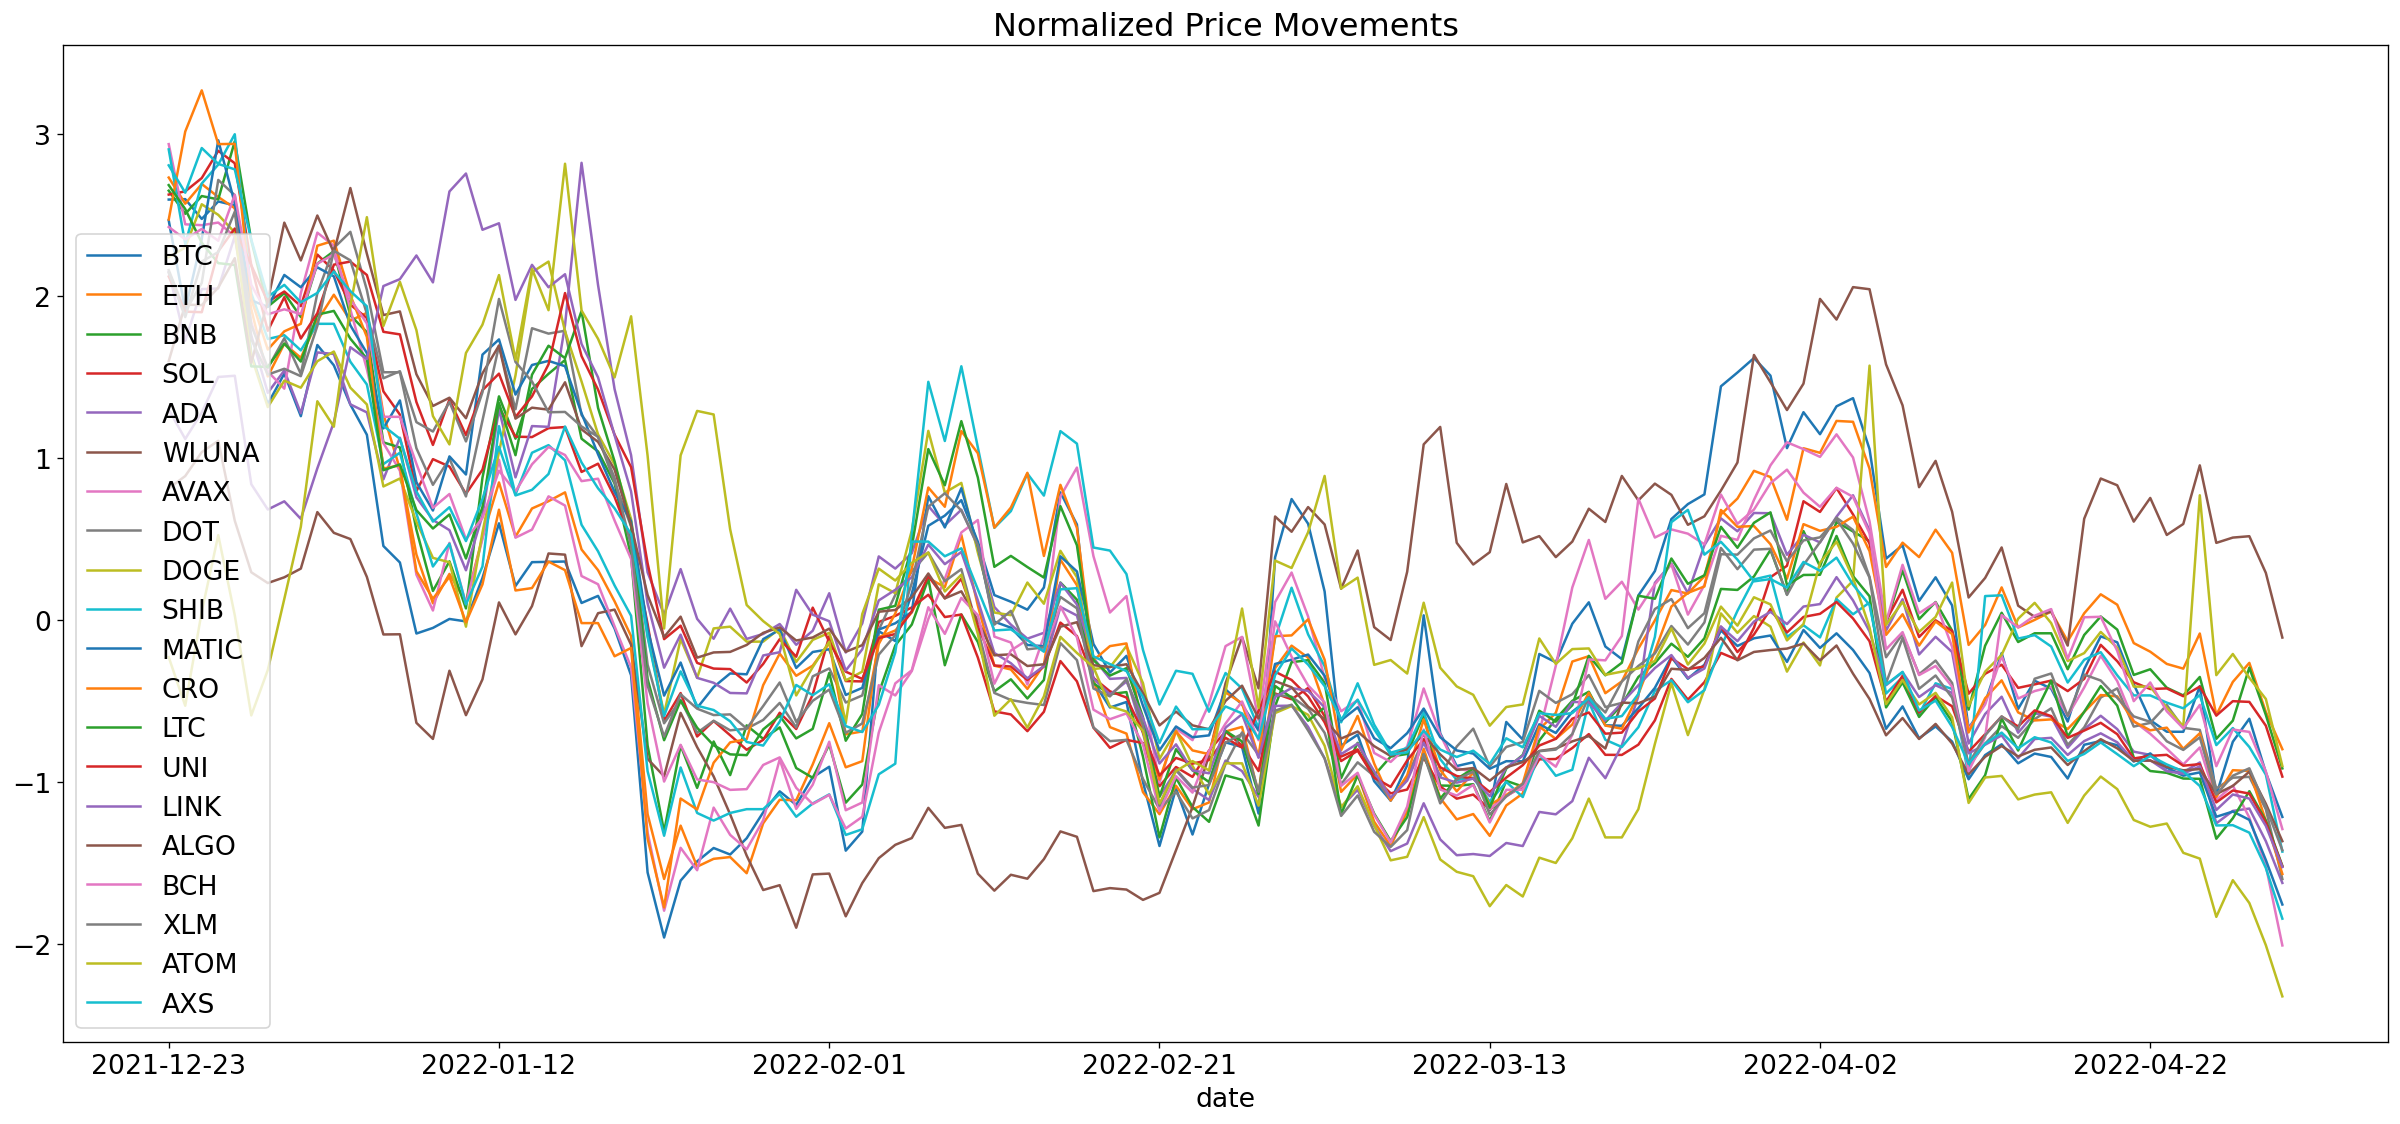

In [99]:
normalized_df.plot(figsize=(25,11),title="Normalized Price Movements")

## Percent Changes

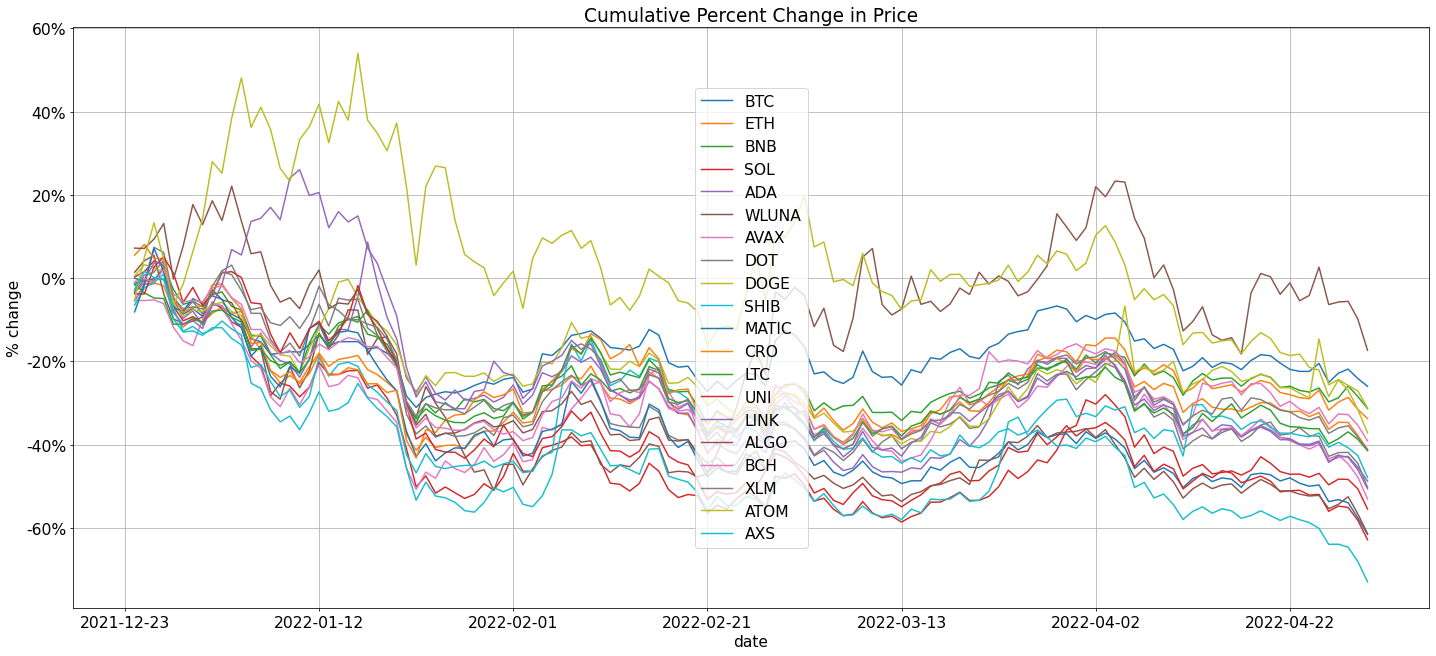

In [148]:
_price_change = historic_df.diff().cumsum()
percent_change_df = (_price_change / historic_df.iloc[0])*100
percent_change_df


ax = percent_change_df.plot(
        title="Cumulative Percent Change in Price",
        figsize=(25,11),
        grid=True,
        ylabel="% change"
)

ax.legend(loc="center")
ax.yaxis.set_major_formatter(mpl.ticker.FuncFormatter(lambda x,pos: f"{x:.0f}%"))

### Tracking Investment

In [13]:
init_investments = init_portfolio['Amount']
init_investments

Coin
BTC           0.000307
ETH           0.003787
BNB           0.023982
SOL           0.058000
WLUNA         0.104000
DOT           0.352000
AVAX          0.080000
ADA           7.120000
DOGE         42.300000
SHIB     164383.000000
XLM          16.000000
ALGO          3.000000
LINK          0.210000
BCH           0.010157
AXS           0.043000
UNI           0.259222
LTC           0.028594
ATOM          0.100000
CRO           7.800000
MATIC         1.700000
Name: Amount, dtype: float64

In [14]:
init_portfolio.columns

Index(['Amount', 'Net Cost', 'Fees', 'Investment', 'Cost Basis',
       '% Allocation'],
      dtype='object')

In [15]:
value_df = historic_df.multiply(init_investments, axis=1)
value_df

,ADA,ALGO,ATOM,AVAX,AXS,BCH,BNB,BTC,CRO,DOGE,DOT,ETH,LINK,LTC,MATIC,SHIB,SOL,UNI,WLUNA,XLM
date,,,,,,,,,,,,,,,,,,,,
2021-12-23,10.497016,4.4091,2.838,9.7096,4.62121,4.630662,13.166118,15.606013,4.64178,7.82973,10.26784,15.574465,4.6599,4.681941,4.56586,6.361622,11.02406,4.712656,9.81968,4.604416
2021-12-24,9.921720,4.7280,2.687,9.1944,4.49866,4.593489,13.000642,15.608831,4.89840,7.87626,9.91584,15.334283,4.5087,4.613602,4.19679,5.950665,11.05770,4.536385,9.96008,4.458048
2021-12-25,10.353904,4.7244,2.979,9.1888,4.69861,4.624873,13.127747,15.478970,5.01852,8.08353,10.15872,15.515206,4.6452,4.517812,4.48953,6.213677,11.19748,4.533793,10.23256,4.640752
2021-12-26,10.358888,4.8237,3.217,9.2056,4.62766,4.589325,13.103765,15.593609,4.86174,8.03277,11.03168,15.395853,4.8279,4.459481,4.89481,6.295869,11.48400,4.839675,10.36152,4.671792
2021-12-27,10.796768,4.9893,2.968,9.1168,4.60315,4.727352,13.518653,15.567820,4.86252,7.94817,10.90144,15.292593,4.8342,4.454334,4.63539,6.427375,11.35292,4.953732,9.45152,4.804608
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-04-26,5.880408,1.9686,2.031,5.4960,1.66754,3.010697,9.254654,11.699037,2.95776,5.82471,5.87488,10.637460,2.5977,2.819058,2.11599,3.779165,5.55292,2.073776,9.19880,2.887472
2022-04-27,5.984360,2.0145,2.145,5.5880,1.66883,3.120794,9.384157,12.048128,3.03576,5.92623,5.96640,10.942354,2.6775,2.877389,2.13758,3.853138,5.70430,2.133397,9.25912,2.949120
2022-04-28,6.004296,2.0949,2.074,5.3824,1.63529,3.113684,9.763072,12.199181,3.03342,5.81202,5.97344,11.117029,2.6565,2.954592,2.10341,3.770946,5.69676,2.117844,9.27472,2.973552


In [16]:
value_df['total'] = value_df.sum(axis=1)

In [17]:
value_df

,ADA,ALGO,ATOM,AVAX,AXS,BCH,BNB,BTC,CRO,DOGE,...,ETH,LINK,LTC,MATIC,SHIB,SOL,UNI,WLUNA,XLM,total
date,,,,,,,,,,,,,,,,,,,,,
2021-12-23,10.497016,4.4091,2.838,9.7096,4.62121,4.630662,13.166118,15.606013,4.64178,7.82973,...,15.574465,4.6599,4.681941,4.56586,6.361622,11.02406,4.712656,9.81968,4.604416,154.221669
2021-12-24,9.921720,4.7280,2.687,9.1944,4.49866,4.593489,13.000642,15.608831,4.89840,7.87626,...,15.334283,4.5087,4.613602,4.19679,5.950665,11.05770,4.536385,9.96008,4.458048,151.539495
2021-12-25,10.353904,4.7244,2.979,9.1888,4.69861,4.624873,13.127747,15.478970,5.01852,8.08353,...,15.515206,4.6452,4.517812,4.48953,6.213677,11.19748,4.533793,10.23256,4.640752,154.423084
2021-12-26,10.358888,4.8237,3.217,9.2056,4.62766,4.589325,13.103765,15.593609,4.86174,8.03277,...,15.395853,4.8279,4.459481,4.89481,6.295869,11.48400,4.839675,10.36152,4.671792,156.676637
2021-12-27,10.796768,4.9893,2.968,9.1168,4.60315,4.727352,13.518653,15.567820,4.86252,7.94817,...,15.292593,4.8342,4.454334,4.63539,6.427375,11.35292,4.953732,9.45152,4.804608,156.206646
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-04-26,5.880408,1.9686,2.031,5.4960,1.66754,3.010697,9.254654,11.699037,2.95776,5.82471,...,10.637460,2.5977,2.819058,2.11599,3.779165,5.55292,2.073776,9.19880,2.887472,97.327627
2022-04-27,5.984360,2.0145,2.145,5.5880,1.66883,3.120794,9.384157,12.048128,3.03576,5.92623,...,10.942354,2.6775,2.877389,2.13758,3.853138,5.70430,2.133397,9.25912,2.949120,99.416057
2022-04-28,6.004296,2.0949,2.074,5.3824,1.63529,3.113684,9.763072,12.199181,3.03342,5.81202,...,11.117029,2.6565,2.954592,2.10341,3.770946,5.69676,2.117844,9.27472,2.973552,99.751057


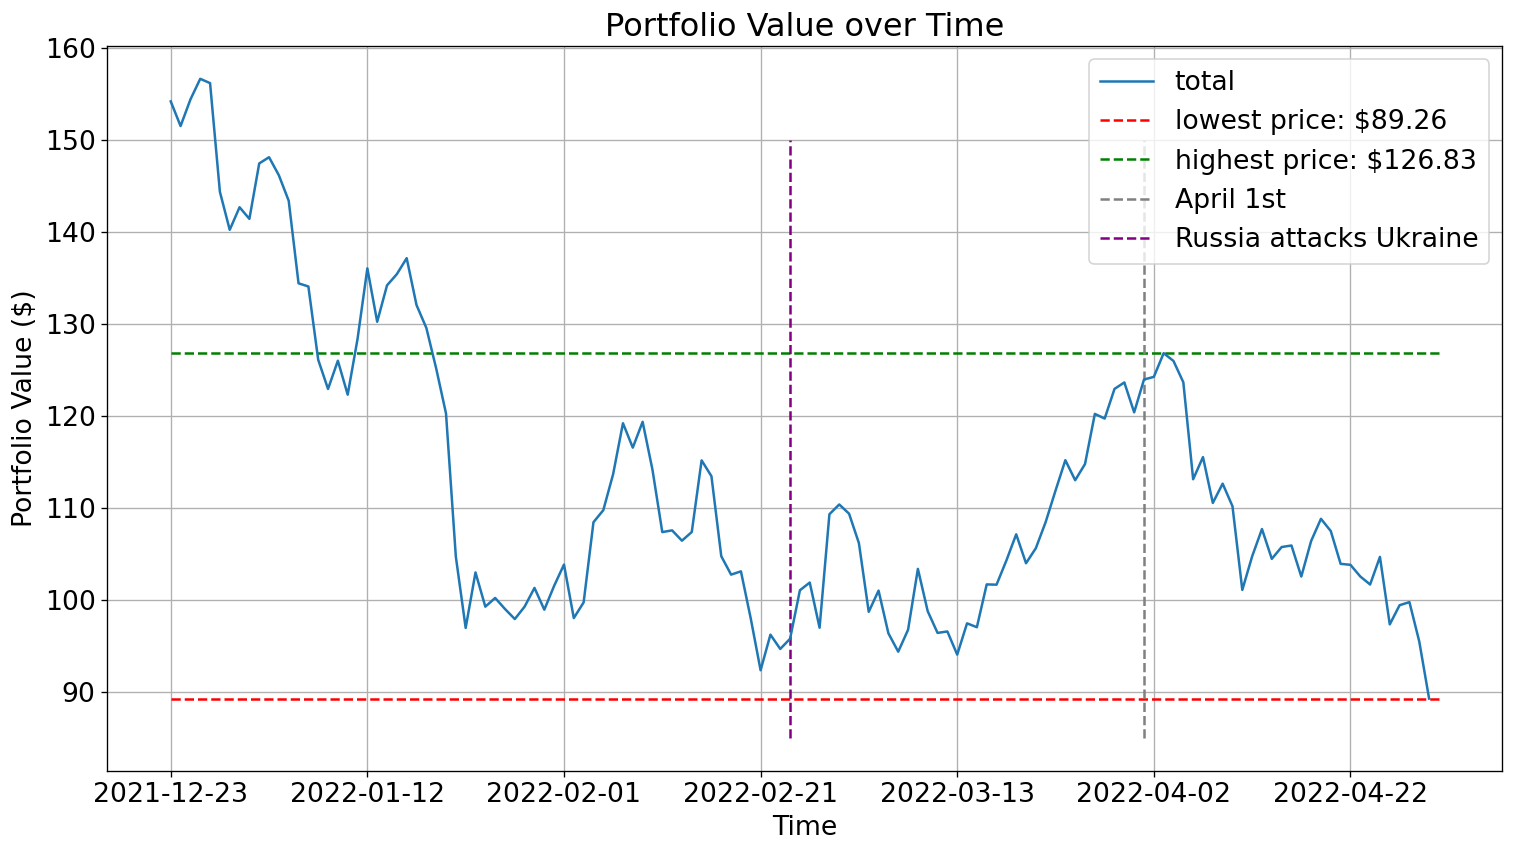

In [101]:
ax = value_df['total'].plot(figsize=(15,8), 
                            ylabel='Portfolio Value ($)', 
                            xlabel='Time',
                            #marker='|', 
                            #markersize=10,
                            title="Portfolio Value over Time",
                            grid=True)

#ax.grid('on', which='minor', axis='y' )
#ax.grid('off', which='major', axis='y',)# linestyle='-', linewidth=0.25,)
#ax.hlines(value_df['total'].min(), ax.get_xticks()[0], ax.get_xticks()[-1], linestyle='--', color='red')
#ax.hlines(114, ax.get_xticks()[0], ax.get_xticks()[-1], linestyle='--', color='green')

#------- Creating Horizontal and Vertical Lines For Important Dates
xmin = 0
xmax = len(value_df)
ymin = 85
ymax = 150

highest_price = value_df[month_begin_date:end_date]['total'].max()
lowest_price  = value_df[month_begin_date:end_date]['total'].min()
ax.hlines(lowest_price, xmin=xmin, xmax=xmax, linestyle='--', color='red'   , label=f"lowest price: ${lowest_price:.2f}")
ax.hlines(highest_price, xmin=xmin, xmax=xmax, linestyle='--', color='green', label=f"highest price: ${highest_price:.2f}")

#ax.vlines('10', ax.get_yticks().min(), ax.get_yticks().max(), linestyle='--', color='white')
#ax.vlines(40, ax.get_yticks().min(), ax.get_yticks().max(), linestyle='--', color='gray', label="February 1st")
#ax.vlines(63, ax.get_yticks().min(), ax.get_yticks().max(), linestyle='--', color='purple', label="Russia attacks Ukraine")

ax.vlines(99, ymin=ymin, ymax=ymax, linestyle='--', color='gray', label="April 1st")
ax.vlines(63, ymin=ymin, ymax=ymax, linestyle='--', color='purple', label="Russia attacks Ukraine")


#------- Makes Line lables show up
ax.legend()

#ax.plot(pad_inches=0)

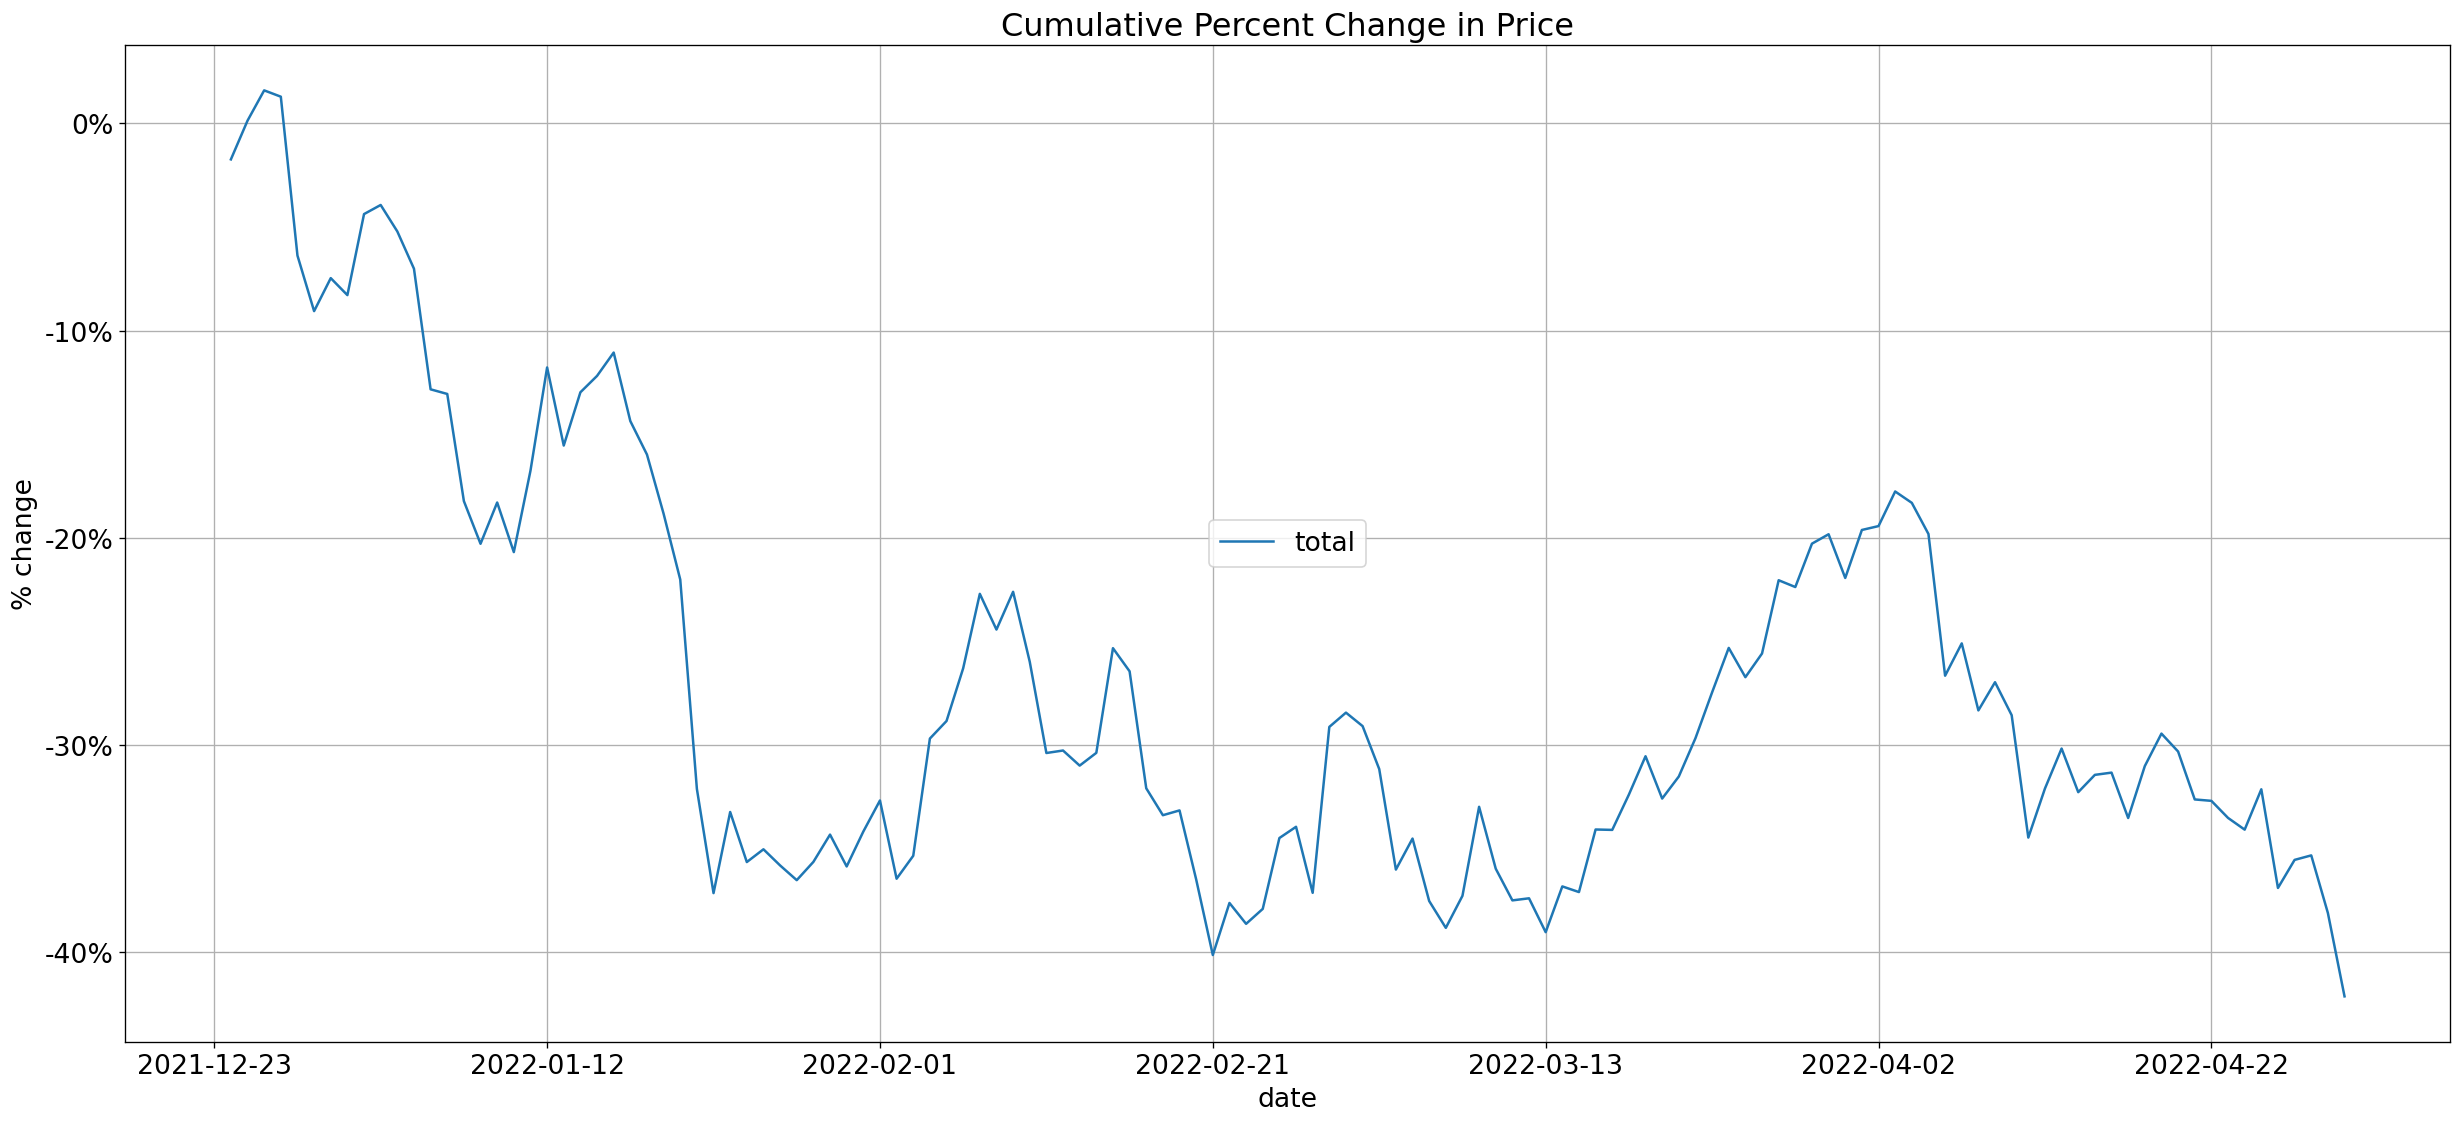

In [102]:
_price_change = value_df['total'].diff().cumsum()
percent_change_df = (_price_change / value_df['total'].iloc[0])*100
percent_change_df


ax = percent_change_df.plot(
        title="Cumulative Percent Change in Price",
        figsize=(25,11),
        grid=True,
        ylabel="% change"
)

ax.legend(loc="center")
ax.yaxis.set_major_formatter(mpl.ticker.FuncFormatter(lambda x,pos: f"{x:.0f}%"))

## Correlation Analysis
Simple correlation heatmap between each coin (add correlation between stock market or SPY at some point).

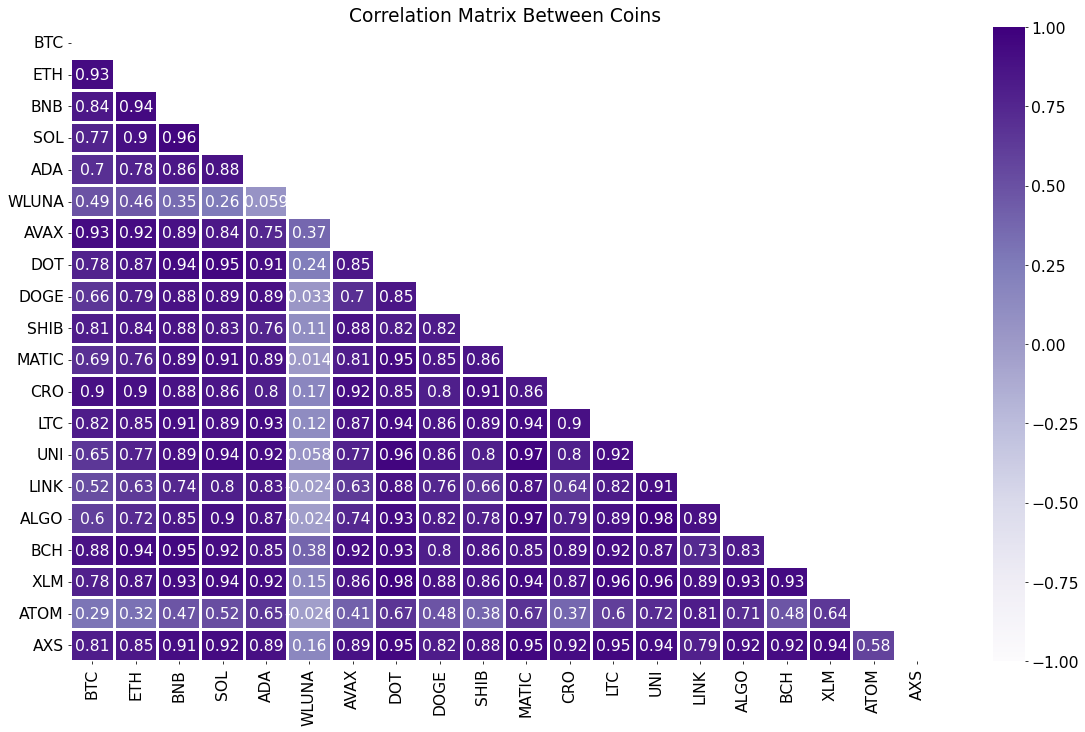

In [149]:
#code for this cell modified from https://www.interviewqs.com/blog/py-stock-correlation

plt.rcParams.update({'font.size': 16}) # must set at the top. It controls text size in charts and plots

plt.figure(figsize=(20, 12))

correlation_df = historic_df.corr(method='pearson')

#take the bottom triangle since it repeats itself
mask = np.zeros_like(correlation_df)
mask[np.triu_indices_from(mask)] = True

#generate plot
cmaps = ['YlOrRd', 'YlGnBu', 'PuBuGn', 'Greys', 'Blues','Reds','Purples', 'Greens']
sns.heatmap(correlation_df, cmap='Purples', vmax=1.0, vmin=-1.0, annot=True, mask = mask, linewidths=2,).set(title="Correlation Matrix Between Coins")

plt.yticks(rotation=0) 
plt.xticks(rotation=90) 

plt.show()

In [135]:
# get_stock_data(symbol='SPY')

## Plot Changes in Allocation Percentages
In this plot, I will show a comparison between the initial allocation vs the current allocation percentages.

In [19]:
# Compute new allocation percentages
current_values = value_df[end_date:].drop('total', axis=1).transpose()[end_date]
current_allocation = ((current_values / current_values.sum()) * 100)
current_allocation

ADA       6.028733
ALGO      1.907668
ATOM      1.998637
AVAX      5.109521
AXS       1.400884
BCH       3.161282
BNB      10.131671
BTC      12.945050
CRO       3.061948
DOGE      6.037386
DOT       5.722018
ETH      11.566581
LINK      2.580864
LTC       3.071734
MATIC     1.966809
SHIB      3.716355
SOL       5.502997
UNI       1.963169
WLUNA     9.097296
XLM       3.029397
Name: 2022-04-30, dtype: float64

In [20]:
index = current_allocation.index
index

Index(['ADA', 'ALGO', 'ATOM', 'AVAX', 'AXS', 'BCH', 'BNB', 'BTC', 'CRO',
       'DOGE', 'DOT', 'ETH', 'LINK', 'LTC', 'MATIC', 'SHIB', 'SOL', 'UNI',
       'WLUNA', 'XLM'],
      dtype='object')

In [21]:
comparison_df = pd.DataFrame({'Orginal % Allocation':init_portfolio['% Allocation'],
                              'Current % Allocation':current_allocation}, index=index)

In [22]:
#-- sort df by current allocation
comparison_df = comparison_df.sort_values(by='Current % Allocation', ascending=False)

In [23]:
comparison_df

,Orginal % Allocation,Current % Allocation
BTC,9.862597,12.945050
ETH,9.862597,11.566581
BNB,8.382878,10.131671
WLUNA,6.440745,9.097296
DOGE,4.994055,6.037386
ADA,6.407716,6.028733
DOT,6.440745,5.722018
SOL,6.903158,5.502997
AVAX,6.434139,5.109521
SHIB,3.943718,3.716355


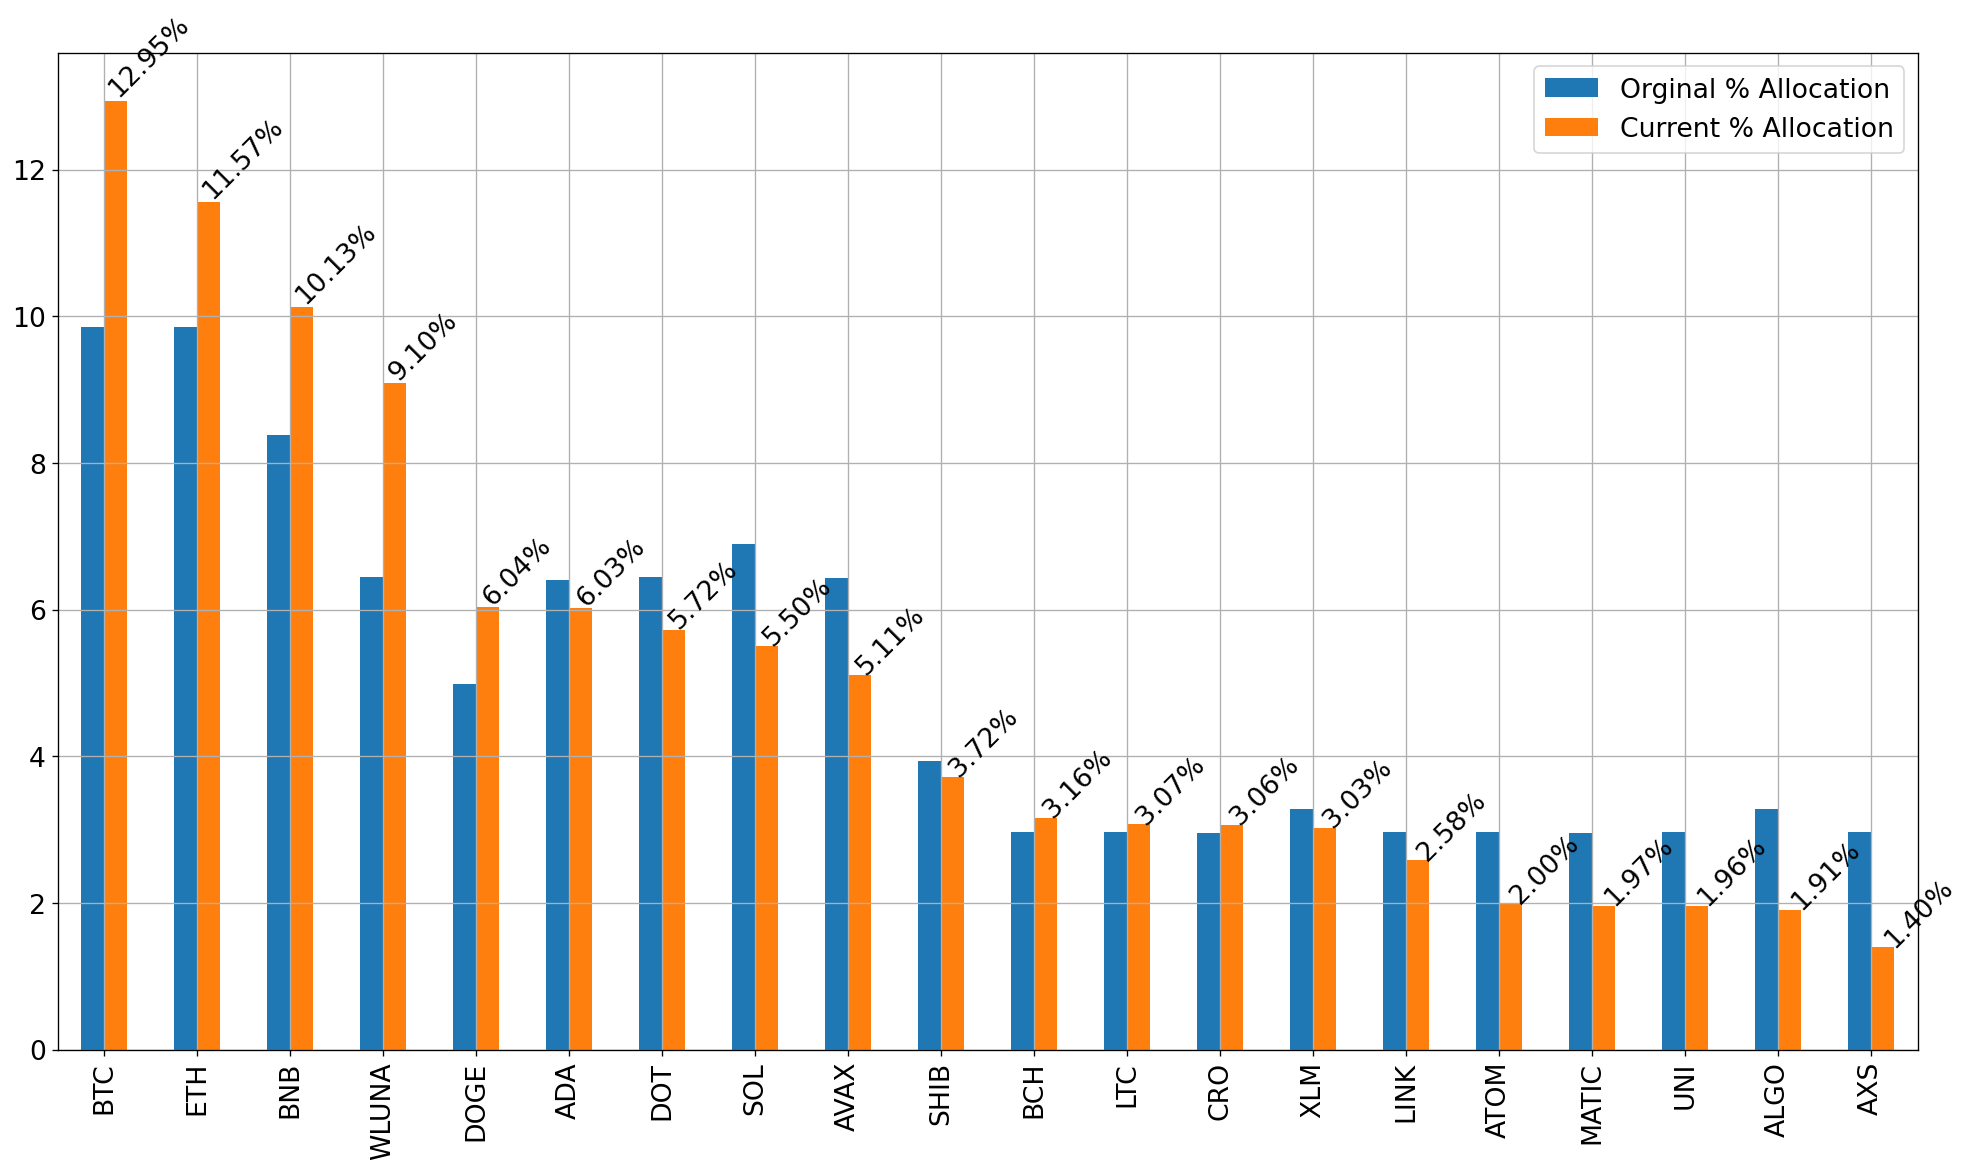

In [103]:
ax = comparison_df.plot(kind = 'bar',
                        y    = ["Orginal % Allocation", "Current % Allocation"],
                        figsize = (20,11),
                        grid=True,
                       )

#ax.grid(axis='y')
ax.legend()

#-- Annotate each bar in the chart
for p in ax.patches:
    if p.xy[0]%1 != 0:  #print(p) to understand what p.xy is
        continue   #cheat way to ignore the initial allocation bars and only plot new ones (it is very messy to put all of them)
    _value:str = f"{p.get_height():.2f}%"
    ax.annotate(_value, (p.get_x() * 1.005, p.get_height() * 1.005),rotation=45)
    #ax.annotate("%.2f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

## Allocation % As a Pie Chart

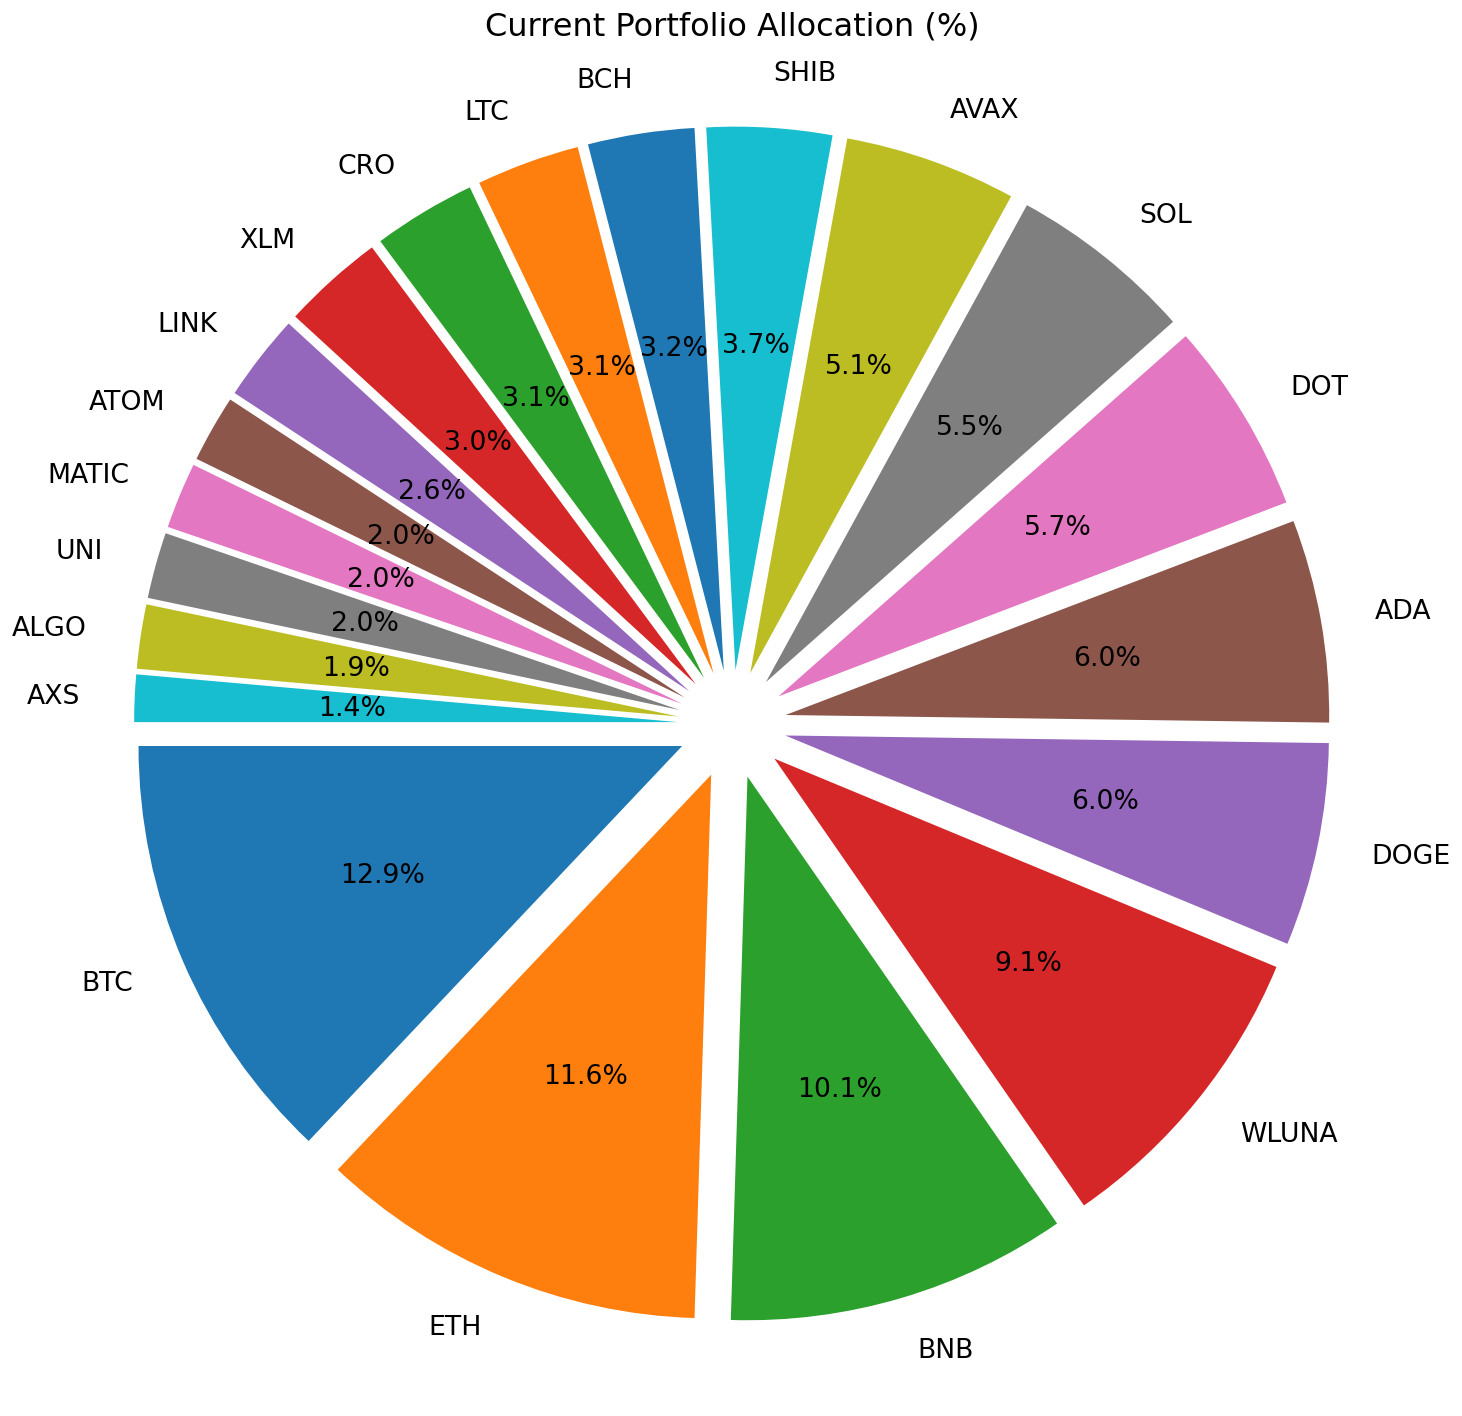

In [104]:
# ax = comparison_df.plot(kind = 'pie',
#                         y    = "Current % Allocation",
#                         figsize = (20,11),
#                         #grid=True,
#                        )

ax = comparison_df.plot(
        kind='pie',
        y='Current % Allocation',
        figsize = (15,15),
        title="Current Portfolio Allocation (%)", 
        legend=False,
        label="",  #this prevents a label for the column to be created on the side of the pie
                   
        autopct='%1.1f%%', 
        #explode=[0.1]*5 + [0.05]*(len(comparison_df)-5),  #provide a list of how much to explode each wedge (list length must be the same as number of coins)
        explode=[0.1]*len(comparison_df),
        #shadow=True, 
        startangle=180,
)

#ax.legend(loc='best')

## Monthly Performance

In [105]:
_month_init = value_df['total'].loc[month_begin_date]
_month_end  = value_df['total'].loc[end_date]
_percent_change = ((_month_end - _month_init) / _month_init) * 100

_monthly_min = value_df['total'][month_begin_date:end_date].min()
_monthly_max = value_df['total'][month_begin_date:end_date].max()

print(f"Initial Value : ${_month_init:.2f}")
print(f"Final Value   : ${_month_end:.2f}")
print(f"Value Change  : ${_month_end - _month_init:.2f}\n")

print(f"Lowest Value  : ${_monthly_min:.2f}")
print(f"Highest Value : ${_monthly_max:.2f}\n")

print(f"Monthly Gain/Loss (%): {_percent_change:.2f}")

Initial Value : $123.97
Final Value   : $89.26
Value Change  : $-34.70

Lowest Value  : $89.26
Highest Value : $126.83

Monthly Gain/Loss (%): -28.00


## Total Performance
Performance since portfolio inception.

In [106]:
_total_init = value_df['total'].loc[start_date]
_total_end  = value_df['total'].loc[end_date]
_total_percent_change = ((_total_end - _total_init) / _total_init) * 100

_total_min = value_df['total'].min()
_total_max = value_df['total'].max()

print(f"Initial Value : ${_total_init:.2f}")
print(f"Final Value   : ${_total_end:.2f}")
print(f"Value Change  : ${_total_end - _total_init:.2f}\n")

print(f"Lowest Value  : ${_total_min:.2f}")
print(f"Highest Value : ${_total_max:.2f}\n")

print(f"Total Gain/Loss (%): {_total_percent_change:.2f}")

Initial Value : $154.22
Final Value   : $89.26
Value Change  : $-64.96

Lowest Value  : $89.26
Highest Value : $156.68

Total Gain/Loss (%): -42.12
